In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




In [3]:
# 2. Load Dataset (with proper file path check)
file_path = r"C:\Users\FARHAT\Desktop\MallCustomer.csv"

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found at: {file_path}")

# Load dataset once
df = pd.read_csv(file_path)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   18                  15                       1
1           2  Female   19                  16                       2
2           3    Male   20                  17                       3
3           4  Female   21                  18                       4
4           5    Male   22                  19                       5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   45.500000           48.000000               50.500000
std     57.879185   17.629635           19.568203               28.938507
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   30.000000           31.000000               25.750000
50%    100.500000   44.000000    

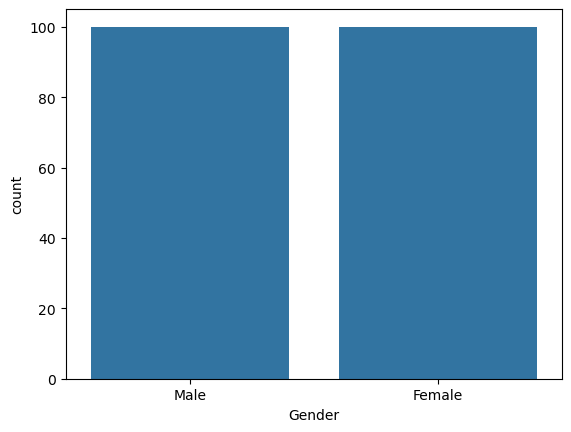

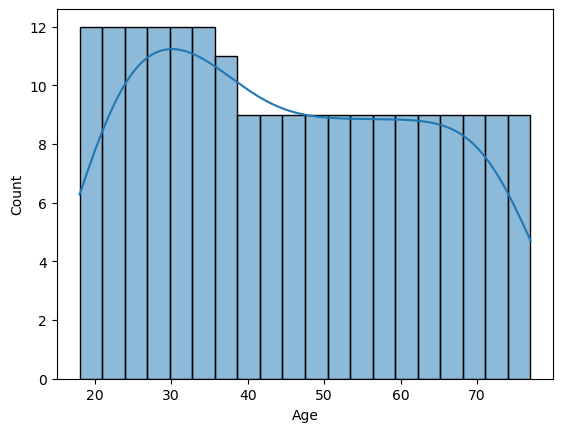

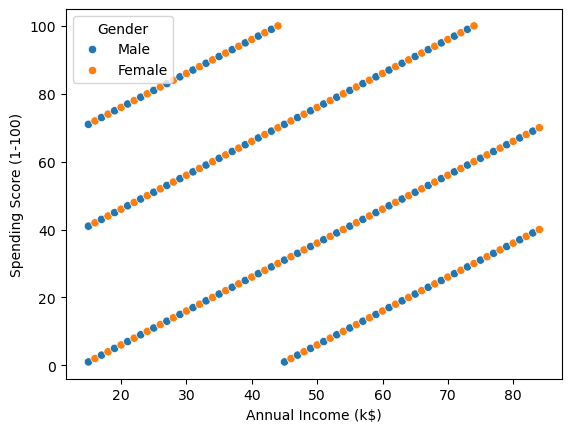

In [4]:
# 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df['Gender'].value_counts())

# Visualizations
sns.countplot(x='Gender', data=df)
plt.show()

sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.show()

In [5]:
# 4. Preprocessing
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Using key features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


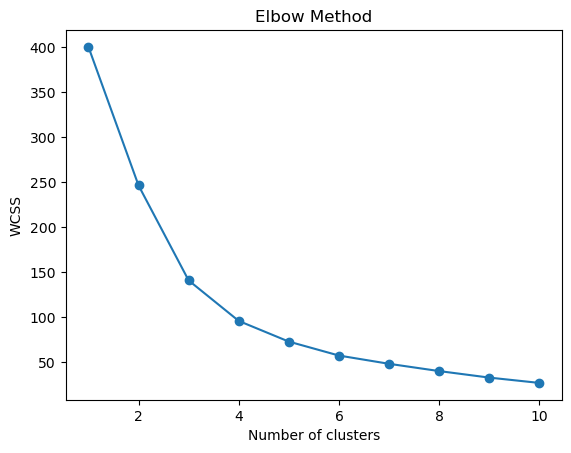

Clusters=2, Silhouette Score=0.392
Clusters=3, Silhouette Score=0.426
Clusters=4, Silhouette Score=0.432
Clusters=5, Silhouette Score=0.422
Clusters=6, Silhouette Score=0.420
Clusters=7, Silhouette Score=0.436
Clusters=8, Silhouette Score=0.473
Clusters=9, Silhouette Score=0.503
Clusters=10, Silhouette Score=0.532


In [6]:
# 5. Determine Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optional: Silhouette Score to validate
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Clusters={i}, Silhouette Score={score:.3f}')


In [7]:
# 6. Apply K-Means
k = 5  # Choose based on elbow/silhouette
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


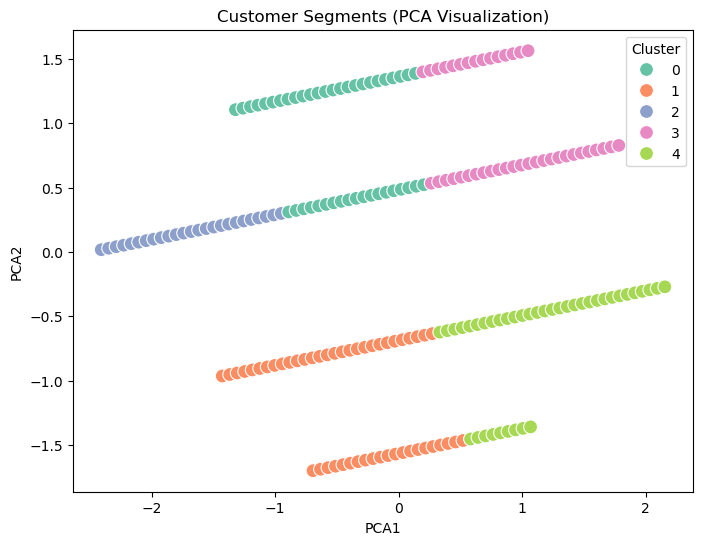

In [8]:
# 7. PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, s=100)
plt.title('Customer Segments (PCA Visualization)')
plt.show()

In [9]:
# 8. Analyze Each Cluster
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.409091           53.545455               22.500000
1        46.120000           27.320000               65.920000
2        30.000000           27.000000               13.000000
3        43.585366           73.512195               48.536585
4        45.475000           54.725000               87.475000


In [10]:
# 9. Suggest Marketing Strategies
for i in range(k):
    print(f"\nCluster {i}:")
    avg_income = cluster_summary.loc[i, 'Annual Income (k$)']
    avg_spending = cluster_summary.loc[i, 'Spending Score (1-100)']
    if avg_income < 60 and avg_spending < 50:
        print("Low income, low spending: Budget-friendly promotions.")
    elif avg_income < 60 and avg_spending >= 50:
        print("Low income, high spending: Trend-focused loyalty rewards.")
    elif avg_income >= 60 and avg_spending < 50:
        print("High income, low spending: Target for premium products.")
    elif avg_income >= 60 and avg_spending >= 50:
        print("High income, high spending: VIP programs, exclusive offers.")
    else:
        print("General segment: Standard marketing campaigns.")


Cluster 0:
Low income, low spending: Budget-friendly promotions.

Cluster 1:
Low income, high spending: Trend-focused loyalty rewards.

Cluster 2:
Low income, low spending: Budget-friendly promotions.

Cluster 3:
High income, low spending: Target for premium products.

Cluster 4:
Low income, high spending: Trend-focused loyalty rewards.
